<a href="https://colab.research.google.com/github/ayush029sahu/data_science_pro/blob/master/gpu_bench_marking_with_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

we are gonna perform image classification on cifar10 data set in keras containing 50000 images with 10 individual categories of classes of images each of 32x32 matrix where the elements inside matrix represents the rbg map of the images pixel contrast

These are samll images colored form

In [7]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


50000-total images
32,32-each image matrix size
3- (red,green,blue)

In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
x_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

y represents the classes of image
y=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
index=[0,1,2,3,4,5,6,7,8,9]
total 9 images

In [10]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

create a function to display image of an particular index of x_train sample

In [11]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(x_train[index])

[[None]
 [None]
 [None]
 [None]]


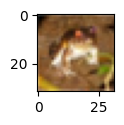

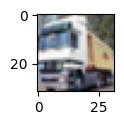

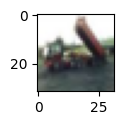

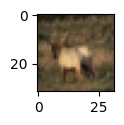

In [36]:

arr=np.array([plot_sample(0),plot_sample(1),plot_sample(2),plot_sample(3)])
arr2=arr.reshape(4,1)
print(arr2)

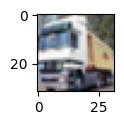

In [13]:
plot_sample(1)

In [14]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


In [15]:
y_train[3][0]

4

In [16]:
classes[y_train[3][0]]

'deer'

since the elements inside the matrix are the rgb values of an image and the range of rgb value lies between (0-255)
so to scale our x_trian and x_test we simply divide them with 255 to achieve scaling

In [17]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [18]:
x_train_scaled[0][0]

array([[0.23137255, 0.24313725, 0.24705882],
       [0.16862745, 0.18039216, 0.17647059],
       [0.19607843, 0.18823529, 0.16862745],
       [0.26666667, 0.21176471, 0.16470588],
       [0.38431373, 0.28627451, 0.20392157],
       [0.46666667, 0.35686275, 0.24705882],
       [0.54509804, 0.41960784, 0.29411765],
       [0.56862745, 0.43137255, 0.31372549],
       [0.58431373, 0.45882353, 0.34901961],
       [0.58431373, 0.47058824, 0.36470588],
       [0.51372549, 0.40392157, 0.30196078],
       [0.49019608, 0.38823529, 0.29803922],
       [0.55686275, 0.45098039, 0.35686275],
       [0.56470588, 0.43921569, 0.3372549 ],
       [0.5372549 , 0.41176471, 0.30980392],
       [0.50588235, 0.38039216, 0.27843137],
       [0.5372549 , 0.41568627, 0.30980392],
       [0.5254902 , 0.41568627, 0.29803922],
       [0.48627451, 0.38039216, 0.25098039],
       [0.54509804, 0.44313725, 0.30588235],
       [0.54509804, 0.43921569, 0.29411765],
       [0.52156863, 0.41176471, 0.27058824],
       [0.

now as we know to deal with y which are values of the classes
index=[0,1,2,3,4,5,6,7,8,9]
from 0-9 it is difficult to perform task on them
to convert into binary format we can perform OneHotEncoding on it to convert it into a matrix where index becomes 1 and other element as zero

In [19]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

using keras inbuilt api we can directly perform OHE

In [20]:
y_train_categorical=keras.utils.to_categorical(
    y_train,num_classes=10
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [21]:
y_test_categorical=keras.utils.to_categorical(
    y_test,num_classes=10
)


now we create the neuron layer for our prediction

In [22]:
x_train.shape

(50000, 32, 32, 3)

In [23]:
model=keras.Sequential([
    #creating the input layer,which should be flat in nature so we will flatten the input matrix for operation
    keras.layers.Flatten(input_shape=(32,32,3)),
    #now creating the hidden layers which uses relu activation function
    keras.layers.Dense(3000,activation='relu'),
    #creating second hidden layer for better optimization
    keras.layers.Dense(1000,activation='relu'),
    #creating the output layer using sigmoid activation function which converts the 0-1 range probabitity
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_scaled,y_train_categorical,epochs=50)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3079 - loss: 1.9250
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4180 - loss: 1.6470
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4472 - loss: 1.5577
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.4759 - loss: 1.4873
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4907 - loss: 1.4454
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5096 - loss: 1.3893
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5237 - loss: 1.3567
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5395 - loss: 1.3128
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5529 - loss: 1.2846
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5598 - loss: 1.2474
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5701 - loss: 1.2264
Epoch 12/50
1563/1563 ━━━━━━━

in above code while using loss hyperparameter remember that we use
loss='sparse_categorical_crossentropy' when the input is in  discrete form which is->y_train=array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)
but we use
loss='categorical_crossentropy' when the input is in categorical form which is ->
y_test_categorical[:5]=array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [24]:
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [25]:
model(x_test_scaled)[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.07293256e-01, 7.83360973e-02, 9.42096591e-01, 9.97777998e-01,
       9.94431555e-01, 8.58501434e-01, 4.31622118e-02, 8.45749746e-05,
       7.81676173e-01, 2.09681734e-01], dtype=float32)>

In [26]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

as the prediction will return an array of the predicted values which along
[0.1, 0.05, 0.2, 0.15, 0.05, 0.3, 0.05, 0.05, 0.02, 0.03] from which we need to extract the max value using argmax function

In [27]:
predict=np.argmax(model.predict(x_test_scaled)[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


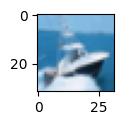

In [28]:
plot_sample(predict)

In [29]:
classes[y_test[1][0]]

'ship'

In [30]:
model.evaluate(x_test_scaled,y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5695 - loss: 1.5366


[1.5642014741897583, 0.5649999976158142]